In [1]:
import numpy as np
import pandas as pd

# series in 1d and dataframe are 2D objects..

But why?

and what exactly in index?

In [2]:
# can we have multiple index? Let's try

index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ("ece", 2019), ("ece", 2020), ("ece", 2021), ("eсe", 2022)]
a = pd.Series([1,2,3,4,5,6,7,8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(eсe, 2022)    8
dtype: int64

In [6]:
# the solution -> multiindex series (also known as Hierarchical Indexing)
# multi index levels within a single index

In [16]:
# how to create multiindex object

# 1. pd.multiIndex.from_tuples()
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ("ece", 2019), ("ece", 2020), ("ece", 2021), ("eсe", 2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]

Index([2019, 2020, 2021, 2022], dtype='int64')

In [18]:
# 2. pd.multiIndex.from_tuples()

pd.MultiIndex.from_product([['cse', 'ece'], [2019, 2020, 2021, 2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [20]:
# creating a series with multi index object..

s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
eсe  2022    8
dtype: int64

hierarchy structures..

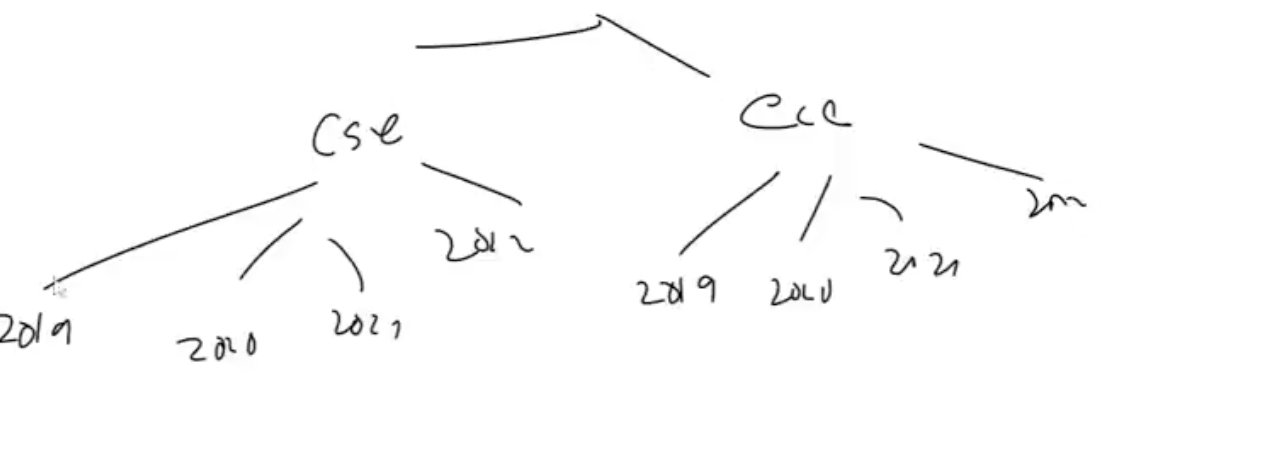

In [24]:
# how to fetch items from such a series
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [25]:
# logical question to ask..

In [27]:
# unstack : multiIndex ko dataframe me convert kar deta hai..  

temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1.0,2.0,3.0,4.0
ece,5.0,6.0,7.0,NaN
eсe,NaN,NaN,NaN,8.0


In [28]:
# stack : oppose of unstack 
# why multindex series ki?
# higher dimension data ko ek lower data ko present ko karna..
temp.stack()

cse  2019    1.0
     2020    2.0
     2021    3.0
     2022    4.0
ece  2019    5.0
     2020    6.0
     2021    7.0
eсe  2022    8.0
dtype: float64

# multiIndex dataframe

In [29]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9, 10],
        [11, 12],
        [13, 14],
        [15, 16],
    ], index= multiindex, 
    columns= ['avg_package', 'students']
)

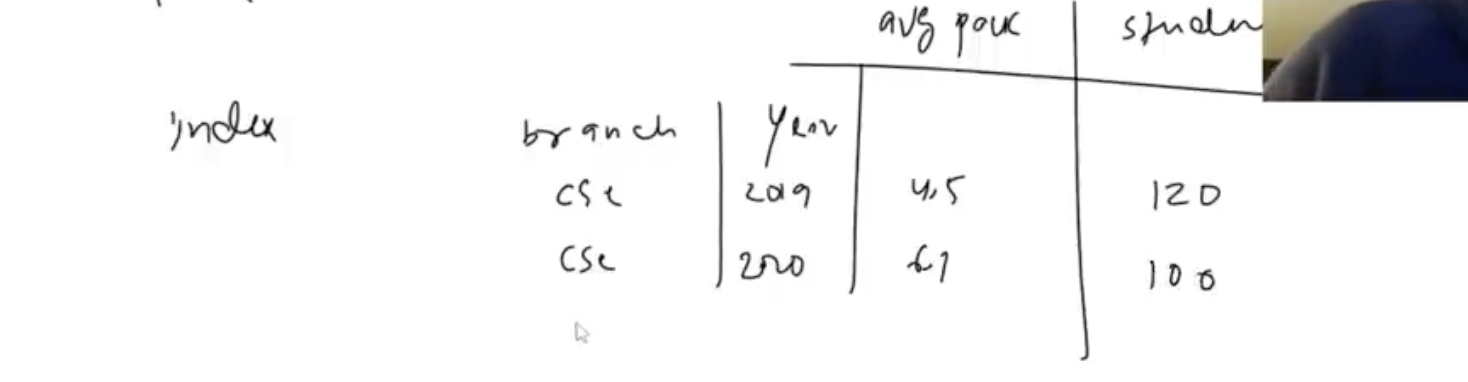

In [30]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
eсe 2022           15        16

In [32]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [34]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
eсe  2022    16
Name: students, dtype: int64

In [35]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
eсe  2022    15
Name: avg_package, dtype: int64

index or columns ko pandas dono ko same samajhta hai..

In [52]:
# multiindex df in terms of both cols and index..
branch_df2 = pd.DataFrame(
    [
        [1,2,3,4],
        [3,4, 7,8],
        [5,6, 10, 11],
        [7,8, 9, 8],
        [9, 10, 12, 15],
        [11, 12, 11, 34],
        [13, 14, 20],
        [15, 16,3,6],
    ], index=[2019, 2020, 2021, 2022, 2023, 2024, 2025, 2030],
    columns = pd.MultiIndex.from_product([['bihar', 'up'],['avg_package', 'students']])
)

branch_df2

bihar                   up         
     avg_package students avg_package students
2019           1        2           3      4.0
2020           3        4           7      8.0
2021           5        6          10     11.0
2022           7        8           9      8.0
2023           9       10          12     15.0
2024          11       12          11     34.0
2025          13       14          20      NaN
2030          15       16           3      6.0

In [53]:
branch_df2['bihar']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8
2023,9,10
2024,11,12
2025,13,14
2030,15,16


In [54]:
branch_df2['up']['avg_package']

2019     3
2020     7
2021    10
2022     9
2023    12
2024    11
2025    20
2030     3
Name: avg_package, dtype: int64

In [55]:
branch_df2.loc[2019]

bihar  avg_package    1.0
       students       2.0
up     avg_package    3.0
       students       4.0
Name: 2019, dtype: float64

In [58]:
branch_df2.ndim

2

stacking and unstacking

In [64]:
branch_df1.unstack() # under walw index ko pakrega and column me badal dega..

# multiindex ho jayega columns ke uper 
# upper wala : avg, students
# under wala year

avg_package                   students                  
           2019  2020  2021  2022     2019  2020  2021  2022
cse         1.0   3.0   5.0   7.0      2.0   4.0   6.0   8.0
ece         9.0  11.0  13.0   NaN     10.0  12.0  14.0   NaN
eсe         NaN   NaN   NaN  15.0      NaN   NaN   NaN  16.0

columns ke under or multi index ho jayegaaa.

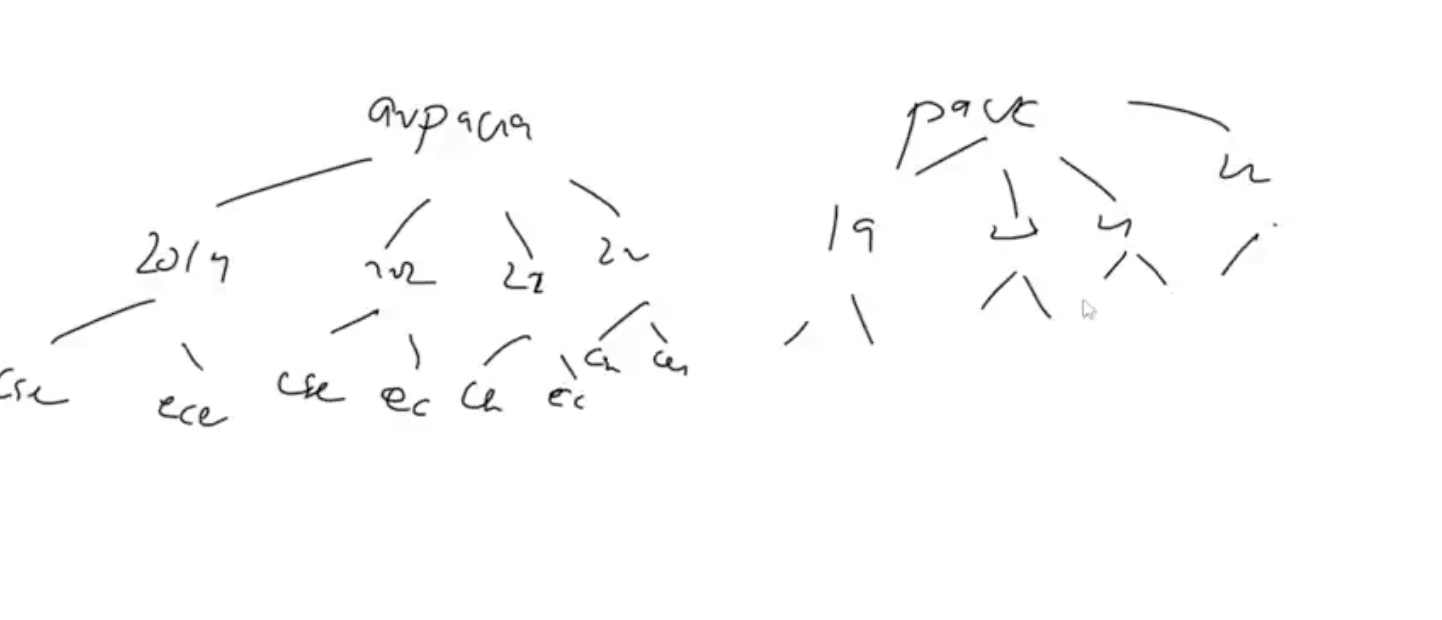


series me convert ho jayegaa...

In [66]:
branch_df1.unstack().unstack()


avg_package  2019  cse     1.0
                   ece     9.0
                   eсe     NaN
             2020  cse     3.0
                   ece    11.0
                   eсe     NaN
             2021  cse     5.0
                   ece    13.0
                   eсe     NaN
             2022  cse     7.0
                   ece     NaN
                   eсe    15.0
students     2019  cse     2.0
                   ece    10.0
                   eсe     NaN
             2020  cse     4.0
                   ece    12.0
                   eсe     NaN
             2021  cse     6.0
                   ece    14.0
                   eсe     NaN
             2022  cse     8.0
                   ece     NaN
                   eсe    16.0
dtype: float64

In [67]:
# stack : columns se rows me wapas ho jata hai..

In [69]:
branch_df1.unstack().stack() # sabse under walw column ko rows bna deta hai

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_15363/3204070641.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack() # sabse under walw column ko rows bna deta hai


avg_package  students
cse 2019          1.0       2.0
    2020          3.0       4.0
    2021          5.0       6.0
    2022          7.0       8.0
ece 2019          9.0      10.0
    2020         11.0      12.0
    2021         13.0      14.0
eсe 2022         15.0      16.0

In [71]:
branch_df1.unstack().stack().stack() # yeha bhi columns ko rows me convert kar diya..

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_15363/1487656515.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df1.unstack().stack().stack() # yeha bhi columns ko rows me convert kar diya..


cse  2019  avg_package     1.0
           students        2.0
     2020  avg_package     3.0
           students        4.0
     2021  avg_package     5.0
           students        6.0
     2022  avg_package     7.0
           students        8.0
ece  2019  avg_package     9.0
           students       10.0
     2020  avg_package    11.0
           students       12.0
     2021  avg_package    13.0
           students       14.0
eсe  2022  avg_package    15.0
           students       16.0
dtype: float64

In [73]:
branch_df2.unstack()

bihar  avg_package  2019     1.0
                    2020     3.0
                    2021     5.0
                    2022     7.0
                    2023     9.0
                    2024    11.0
                    2025    13.0
                    2030    15.0
       students     2019     2.0
                    2020     4.0
                    2021     6.0
                    2022     8.0
                    2023    10.0
                    2024    12.0
                    2025    14.0
                    2030    16.0
up     avg_package  2019     3.0
                    2020     7.0
                    2021    10.0
                    2022     9.0
                    2023    12.0
                    2024    11.0
                    2025    20.0
                    2030     3.0
       students     2019     4.0
                    2020     8.0
                    2021    11.0
                    2022     8.0
                    2023    15.0
                    2024    34.0
          

In [75]:
branch_df2.stack().stack()

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_15363/2534568903.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  avg_package  bihar     1.0
                   up        3.0
      students     bihar     2.0
                   up        4.0
2020  avg_package  bihar     3.0
                   up        7.0
      students     bihar     4.0
                   up        8.0
2021  avg_package  bihar     5.0
                   up       10.0
      students     bihar     6.0
                   up       11.0
2022  avg_package  bihar     7.0
                   up        9.0
      students     bihar     8.0
                   up        8.0
2023  avg_package  bihar     9.0
                   up       12.0
      students     bihar    10.0
                   up       15.0
2024  avg_package  bihar    11.0
                   up       11.0
      students     bihar    12.0
                   up       34.0
2025  avg_package  bihar    13.0
                   up       20.0
      students     bihar    14.0
2030  avg_package  bihar    15.0
                   up        3.0
      students     bihar    16.0
          

# working with multi Index dataframes 

In [82]:
import pandas as pd

# Create branch_df2
branch_df2 = pd.DataFrame(
    [
        [1, 2, 3, 4],
        [3, 4, 7, 8],
        [5, 6, 10, 11],
        [7, 8, 9, 8],
        [9, 10, 12, 15],
        [11, 12, 11, 34],
        [13, 14, 20, None],
        [15, 16, 3, 6],
    ],
    index=[2019, 2020, 2021, 2022, 2023, 2024, 2025, 2030],
    columns=pd.MultiIndex.from_product([['bihar', 'up'], ['avg_package', 'students']])
)

# Add a new dimension ("ece" and "cse") to branch_df2
branch_df3 = pd.concat(
    [branch_df2, branch_df2],
    keys=["ece", "cse"],
    names=["branch"]
)

# Display the resulting DataFrame
print(branch_df3)

                  bihar                   up         
            avg_package students avg_package students
branch                                               
ece    2019           1        2           3      4.0
       2020           3        4           7      8.0
       2021           5        6          10     11.0
       2022           7        8           9      8.0
       2023           9       10          12     15.0
       2024          11       12          11     34.0
       2025          13       14          20      NaN
       2030          15       16           3      6.0
cse    2019           1        2           3      4.0
       2020           3        4           7      8.0
       2021           5        6          10     11.0
       2022           7        8           9      8.0
       2023           9       10          12     15.0
       2024          11       12          11     34.0
       2025          13       14          20      NaN
       2030          15     

In [87]:
# head and tall 
branch_df3.head
# shape 
branch_df3.shape
# info 
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16 entries, ('ece', 2019) to ('cse', 2030)
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (bihar, avg_package)  16 non-null     int64  
 1   (bihar, students)     16 non-null     int64  
 2   (up, avg_package)     16 non-null     int64  
 3   (up, students)        14 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1+ KB


bihar                   up         
            avg_package students avg_package students
branch                                               
ece    2019       False    False       False    False
       2020       False    False       False    False
       2021       False    False       False    False
       2022       False    False       False    False
       2023       False    False       False    False
       2024       False    False       False    False
       2025       False    False       False     True
       2030       False    False       False    False
cse    2019       False    False       False    False
       2020       False    False       False    False
       2021       False    False       False    False
       2022       False    False       False    False
       2023       False    False       False    False
       2024       False    False       False    False
       2025       False    False       False     True
       2030       False    False       False    False

In [88]:
# extracting rows and columns..

In [89]:
# extracting rows single
branch_df3.loc[('cse', 2020)]

bihar  avg_package    3.0
       students       4.0
up     avg_package    7.0
       students       8.0
Name: (cse, 2020), dtype: float64

In [95]:
result = branch_df3.loc[('ece', 2019):('cse', 2022):4]
result

bihar                   up         
            avg_package students avg_package students
branch                                               
ece    2019           1        2           3      4.0
       2023           9       10          12     15.0
cse    2019           1        2           3      4.0

In [100]:
branch_df3.iloc[0:6:2]

bihar                   up         
            avg_package students avg_package students
branch                                               
ece    2019           1        2           3      4.0
       2021           5        6          10     11.0
       2023           9       10          12     15.0

In [103]:
# columns extract

branch_df3['up']['students']

branch      
ece     2019     4.0
        2020     8.0
        2021    11.0
        2022     8.0
        2023    15.0
        2024    34.0
        2025     NaN
        2030     6.0
cse     2019     4.0
        2020     8.0
        2021    11.0
        2022     8.0
        2023    15.0
        2024    34.0
        2025     NaN
        2030     6.0
Name: students, dtype: float64

In [104]:
type(branch_df3['up']['students'])

pandas.core.series.Series

find the students of bihar and avg_pkg of up

In [107]:
branch_df3.iloc[:, 1:3]

bihar          up
            students avg_package
branch                          
ece    2019        2           3
       2020        4           7
       2021        6          10
       2022        8           9
       2023       10          12
       2024       12          11
       2025       14          20
       2030       16           3
cse    2019        2           3
       2020        4           7
       2021        6          10
       2022        8           9
       2023       10          12
       2024       12          11
       2025       14          20
       2030       16           3

In [110]:
# Extracting both
branch_df3.iloc[[0,8], [1,2]]

,,bihar,up
,,students,avg_package
branch,,,
ece,2019,2,3
cse,2019,2,3


In [114]:
# sort_index 
# both -> desending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False, True])
# 1 level pr sorting karna
branch_df3.sort_index(level=1, ascending=False)

bihar                   up         
            avg_package students avg_package students
branch                                               
ece    2030          15       16           3      6.0
cse    2030          15       16           3      6.0
ece    2025          13       14          20      NaN
cse    2025          13       14          20      NaN
ece    2024          11       12          11     34.0
cse    2024          11       12          11     34.0
ece    2023           9       10          12     15.0
cse    2023           9       10          12     15.0
ece    2022           7        8           9      8.0
cse    2022           7        8           9      8.0
ece    2021           5        6          10     11.0
cse    2021           5        6          10     11.0
ece    2020           3        4           7      8.0
cse    2020           3        4           7      8.0
ece    2019           1        2           3      4.0
cse    2019           1        2           3      4.0

In [118]:
# multi index dataframe(col) -> transpose
branch_df3.transpose()

branch             ece                                          cse       \
                  2019 2020  2021 2022  2023  2024  2025  2030 2019 2020   
bihar avg_package  1.0  3.0   5.0  7.0   9.0  11.0  13.0  15.0  1.0  3.0   
      students     2.0  4.0   6.0  8.0  10.0  12.0  14.0  16.0  2.0  4.0   
up    avg_package  3.0  7.0  10.0  9.0  12.0  11.0  20.0   3.0  3.0  7.0   
      students     4.0  8.0  11.0  8.0  15.0  34.0   NaN   6.0  4.0  8.0   

branch                                                
                   2021 2022  2023  2024  2025  2030  
bihar avg_package   5.0  7.0   9.0  11.0  13.0  15.0  
      students      6.0  8.0  10.0  12.0  14.0  16.0  
up    avg_package  10.0  9.0  12.0  11.0  20.0   3.0  
      students     11.0  8.0  15.0  34.0   NaN   6.0

In [121]:
# swap level : year bahar chla jaye or branch under aa jaye..
branch_df3.swaplevel()

bihar                   up         
            avg_package students avg_package students
     branch                                          
2019 ece              1        2           3      4.0
2020 ece              3        4           7      8.0
2021 ece              5        6          10     11.0
2022 ece              7        8           9      8.0
2023 ece              9       10          12     15.0
2024 ece             11       12          11     34.0
2025 ece             13       14          20      NaN
2030 ece             15       16           3      6.0
2019 cse              1        2           3      4.0
2020 cse              3        4           7      8.0
2021 cse              5        6          10     11.0
2022 cse              7        8           9      8.0
2023 cse              9       10          12     15.0
2024 cse             11       12          11     34.0
2025 cse             13       14          20      NaN
2030 cse             15       16           3      6.0

In [123]:
branch_df3.swaplevel(axis=1) # under wale column bahar chla gya or bahar wala under chla aaya hai

avg_package students avg_package students
                  bihar    bihar          up       up
branch                                               
ece    2019           1        2           3      4.0
       2020           3        4           7      8.0
       2021           5        6          10     11.0
       2022           7        8           9      8.0
       2023           9       10          12     15.0
       2024          11       12          11     34.0
       2025          13       14          20      NaN
       2030          15       16           3      6.0
cse    2019           1        2           3      4.0
       2020           3        4           7      8.0
       2021           5        6          10     11.0
       2022           7        8           9      8.0
       2023           9       10          12     15.0
       2024          11       12          11     34.0
       2025          13       14          20      NaN
       2030          15       16           3      6.0

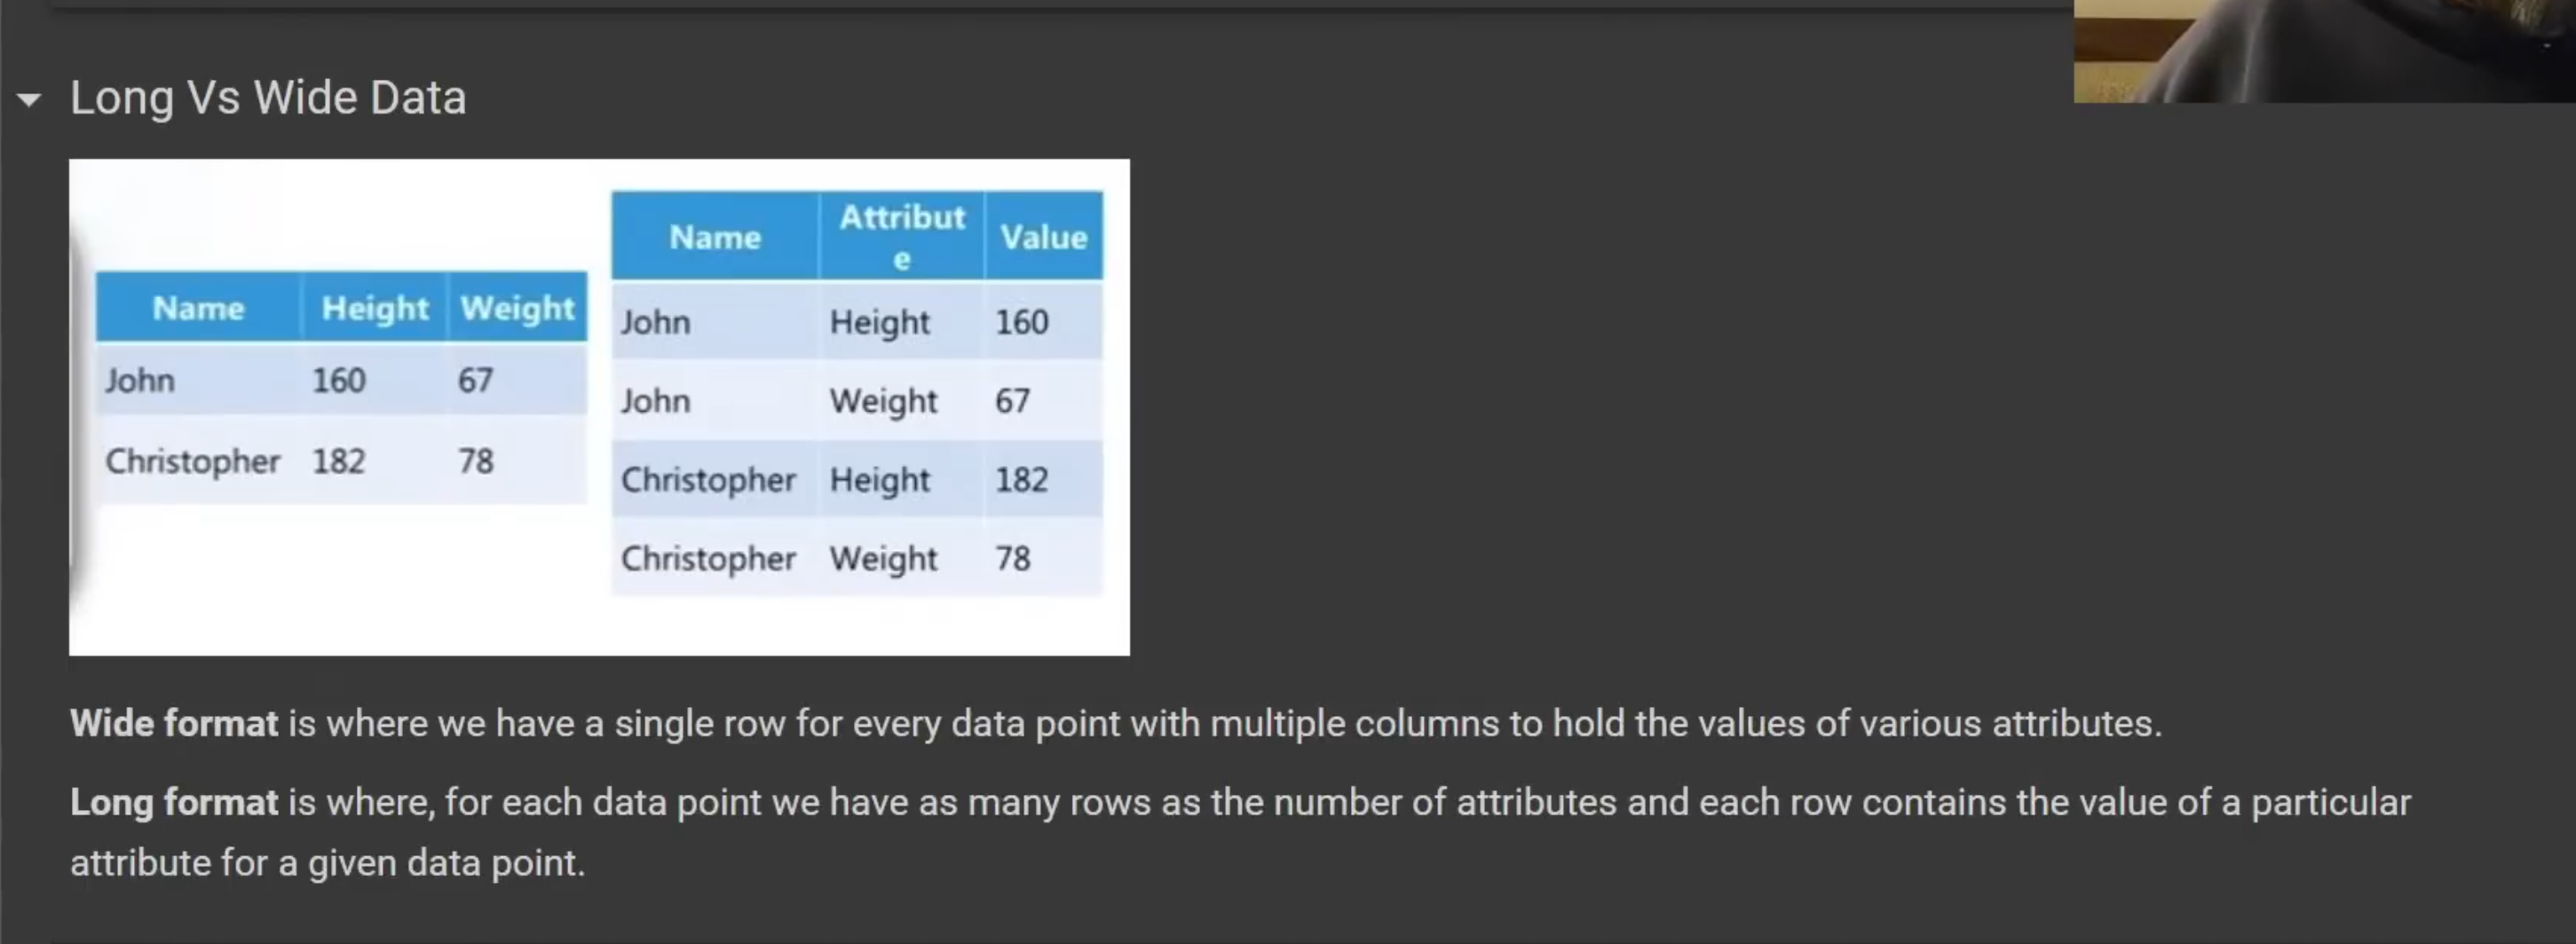

In [124]:
# wide data : isme columns jyada hote hai or rows kam
# log data : isme rows jyada hhote hai or columns kam..

In [126]:
# melt -> iska kam hai wide data ko long data me convert karta hai...
pd.DataFrame({'cse':[120]})

,cse
0,120


In [127]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [129]:
# melt : 
pd.DataFrame({'cse':[120], 'ece':[100], 'mech': [50]}).melt(var_name='branch', value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [134]:
pd.DataFrame(
    {
        'branch' : ['cse', 'ece', 'mech'],
        '2020' : [100, 200, 300],
        '2021' : [120, 100, 1000],
        '2022' : [150, 140, 70]
    }
).melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,200
5,2020,300
6,2021,120
7,2021,100
8,2021,1000
9,2022,150


In [136]:
# melt : 
pd.DataFrame(
    {
        'branch' : ['cse', 'ece', 'mech'],
        '2020' : [100, 200, 300],
        '2021' : [120, 100, 1000],
        '2022' : [150, 140, 70]
    }
).melt(id_vars=['branch']) # ye par branch ko rows me nahi rakhega jaise ki uper me rakha hai..

,branch,variable,value
0,cse,2020,100
1,ece,2020,200
2,mech,2020,300
3,cse,2021,120
4,ece,2021,100
5,mech,2021,1000
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [137]:
# melt : 
pd.DataFrame(
    {
        'branch' : ['cse', 'ece', 'mech'],
        '2020' : [100, 200, 300],
        '2021' : [120, 100, 1000],
        '2022' : [150, 140, 70]
    }
).melt(id_vars=['branch'], var_name='year', value_name='students') # ye par branch ko rows me nahi rakhega

,branch,year,students
0,cse,2020,100
1,ece,2020,200
2,mech,2020,300
3,cse,2021,120
4,ece,2021,100
5,mech,2021,1000
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [6]:
import pandas as pd


In [7]:
# real word data sets..
death = pd.read_csv('time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [8]:
death.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [9]:
# wide format data : dono datasets hai..

In [10]:
death.shape

(289, 1081)

In [11]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [12]:
confirm.shape

(289, 1081)

In [13]:
death = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='num_death')


In [14]:
confirm = confirm.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='num_case')

In [15]:

# # pivot -> iska kam hai long data ko wide data me convert karta hai...


In [16]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [17]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,num_case
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [18]:
confirm

,Province/State,Country/Region,Lat,Long,date,num_case
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [22]:
confirm.merge(death, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'])[['Country/Region', 'date', 'num_death', 'num_case']]


,Country/Region,date,num_death,num_case
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,5708,703228
311249,Winter Olympics 2022,1/2/23,0,535
311250,Yemen,1/2/23,2159,11945
311251,Zambia,1/2/23,4024,334661


convert the wide formate to long data formate here...

# Pivot table : 


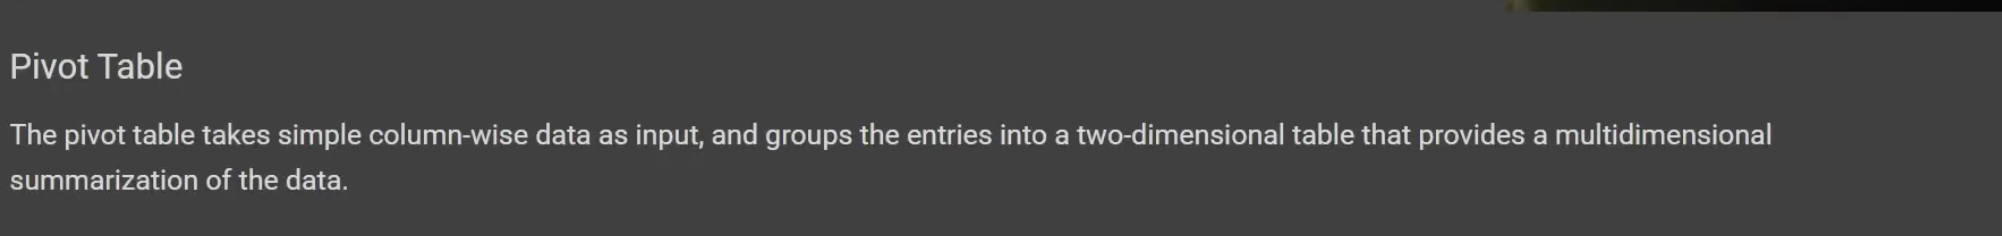

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns # data set visulize karne ke liye..


In [38]:
df = sns.load_dataset('tips')

In [39]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


pivot table work on categorical data

total_bill basis on sex(female, male)

In [40]:
df.groupby('sex')[['total_bill']].mean()

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/2388094044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [41]:
# smoker and nonsmoker kitna bill pay karta hai

df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/3234001293.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

samething do through pivot_table()

In [42]:
df.pivot_table(index='sex', columns='smoker', values='total_bill')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/2612546575.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


# aggfunc

In [43]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/4104209177.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [44]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='count')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/2176768182.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [48]:
# all cols together

# df.pivot_table(index='sex', columns='smoker')['size']

In [49]:
# multi dimensional

df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'])

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/4252854328.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [52]:
# multi dimensional

df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'],values='total_bill')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/2424797039.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [54]:
# multi dimensional

df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size':'mean', 'tip':'max', 'total_bill':'sum'})

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/2386461461.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size':'mean', 'tip':'max', 'total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [60]:
# margins

df.pivot_table(index='sex', columns='smoker',values='total_bill', aggfunc='sum')

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/3958770003.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker',values='total_bill', aggfunc='sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


margins sabhi bills calculates karke deta hai..

In [62]:
df.pivot_table(index='sex', columns='smoker',values='total_bill', aggfunc='sum', margins=True)

/var/folders/kq/d8w7gp1d5dn0q7qm6tzkh4pc0000gn/T/ipykernel_18306/3708074798.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker',values='total_bill', aggfunc='sum', margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [63]:
# plotting graphs..

df = pd.read_csv('expense_data.csv')

In [64]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [65]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


to convert the Date in datatime

In [68]:
df['Date'] = pd.to_datetime(df['Date'])

add one column 'month'

In [74]:
df['month'] = df['Date'].dt.month_name()

In [75]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='month'>

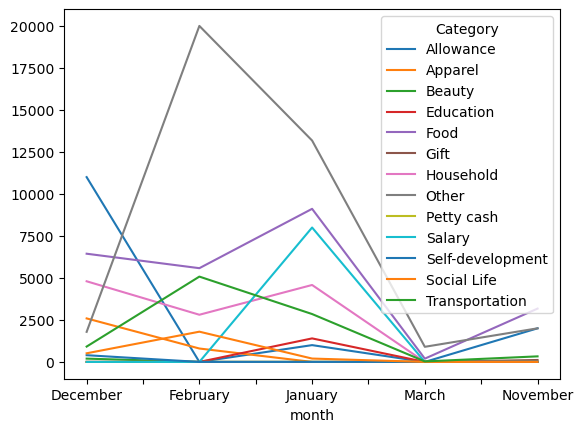

In [76]:
df.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

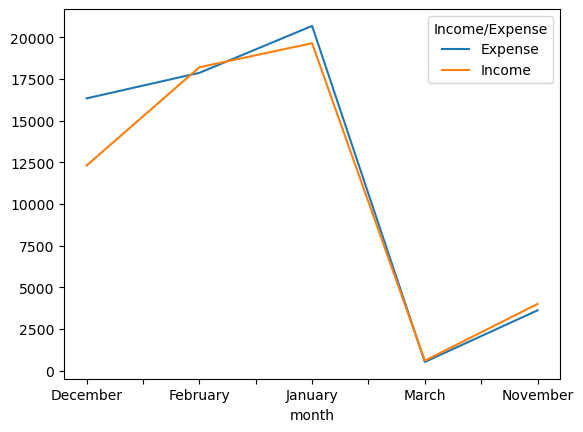

In [77]:
df.pivot_table(index='month', columns='Income/Expense', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

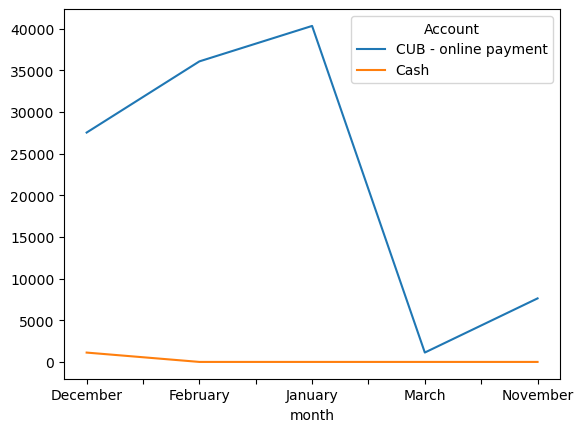

In [78]:
df.pivot_table(index='month', columns='Account', values='INR', aggfunc='sum', fill_value=0).plot()